**Business Case: Netflix - Data Exploration and Visualisation**

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

**Defining Problem Statement :**

**Business Problem**
Analyze the data and generate insights that could help Netflix in deciding  which type of shows/movies to produce and how they can grow the business in different countries.

**Challenges in Data:**
1. Data is not granule, needs to be granularized (Cast,Director,Country Columns have comma seperated Values)
2. Duration column have both continuous and categorical values (values are in Minutes and number of Seasons as Type varies from Movie and TV Show)
3. Must extract relevant Date components from date_added column, for further analysis.
4. There are missing  values in various columns, have to impute it category wise imputation technique.
5. To perform Univariate and Bivariate analysis with different columns to find insights from the given dataset.

**Dataset:**

The dataset provided to you consists of a list of all the TV shows/movies available on Netflix:

**Show_id:** Unique ID for every Movie / Tv Show

**Type:** Identifier - A Movie or TV Show

**Title**: Title of the Movie / Tv Show

**Director:** Director of the Movie

**Cast:** Actors involved in the movie/show

**Country:** Country where the movie/show was produced

**Date_added:** Date it was added on Netflix

**Release_year:** Actual Release year of the movie/show

**Rating:** TV Rating of the movie/show

**Duration:** Total Duration - in minutes or number of seasons

**Listed_in:** Genre

**Description:** The summary description

**IMPORTING DATASET**

In [5]:
#Importing the Dataset
from google.colab import files
uploaded = files.upload()

Saving netflix.csv to netflix.csv


In [41]:
#Using CSV file to create a Pandas DataFrame
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['netflix.csv']))
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**SHAPE OF THE DATA**

In [7]:
# Analysing the Shape of our Dataset
import numpy as np
import pandas as pd
print(df.shape)
print(df.columns)

(8807, 12)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


The Dataset Contains 8807 Rows and 12 Columns.
The Columns of the dataset are as follows:
show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description.

**DATA TYPE OF ATTRIBUTES**

In [8]:
#Understanding the Data Types of the Attributes
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

The Data Types of the Attributes in the given Dataframe are objects except for the release_year column, which is integer(int64)

In [9]:
#Converting Categorical Columns to category data type
for col in ['show_id', 'type', 'title','rating','listed_in']:
    df[col] = df[col].astype('category')
df.dtypes

show_id         category
type            category
title           category
director          object
cast              object
country           object
date_added        object
release_year       int64
rating          category
duration          object
listed_in       category
description       object
dtype: object

Conversion of relevant categorical attributes to 'category' have been *achieved*

**MISSING VALUE DETECTION**

In [10]:
#Checking for null values for each attributes
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

There are 2634 missing values for director column, 825 missing values on cast column, 831 missing values on country column, 10 missing values in date_added column, 4 missing values on rating column, 3 missing values on duration column.

**STATISTICAL SUMMARY OF DATA**

In [11]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,#Alive,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


Each Column have been Statistically summarized in terms of number of occurences, number of unique values, most occuring element and its frequency, etc.

**NON-GRAPHICAL ANALYSIS**

In [12]:
print(df['type'].value_counts())

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


Out of 8807 contents of the Netflix, 6131 are Movies and 2676 are TV Shows.

In [15]:
print(df[df['type']=="Movie"]['release_year'].value_counts().head())

release_year
2017    767
2018    767
2016    658
2019    633
2020    517
Name: count, dtype: int64


Most number of Movies that Netflix holds were released in the years 2018 and 2017

In [16]:
print(df[df['type']=="TV Show"]['release_year'].value_counts().head())

release_year
2020    436
2019    397
2018    380
2021    315
2017    265
Name: count, dtype: int64


Most number of TV shows that Netflix holds were released in the year 2020

**Missing Value Imputation**

In [17]:
df.dropna(subset=['country','rating','date_added','duration'],inplace=True)
df['director'].fillna("Not Available",inplace=True)
df['cast'].fillna("Not Available",inplace=True)
df.shape


(7961, 12)

**VISUAL ANALYSIS**

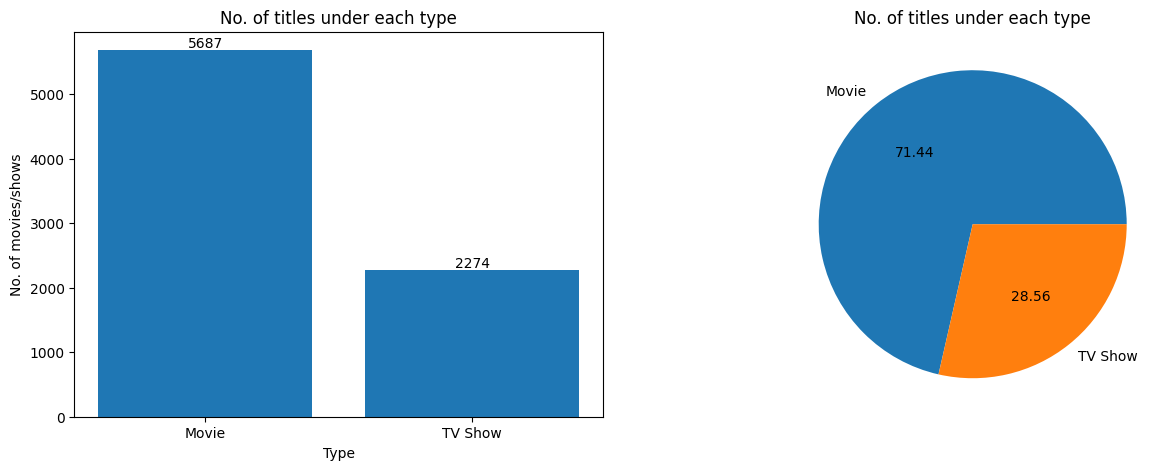

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
barplot=plt.bar(df['type'].unique(), df['type'].value_counts())
plt.bar_label(barplot,labels=df['type'].value_counts())
plt.xlabel("Type")
plt.ylabel("No. of movies/shows")
plt.title("No. of titles under each type")
plt.subplot(1,2,2)
plt.pie(x=df['type'].value_counts(),labels=df['type'].unique(),autopct="%0.2f")
plt.title("No. of titles under each type")
plt.show()


Around 71% of the contents on Netflix are movies and rest 28% contents are TV Shows. Hence, there are more movies present in Netflix compared
to TV Shows.

<ipython-input-35-f7bd2fe7af8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].apply(lambda x: int(x.replace(" min","")))


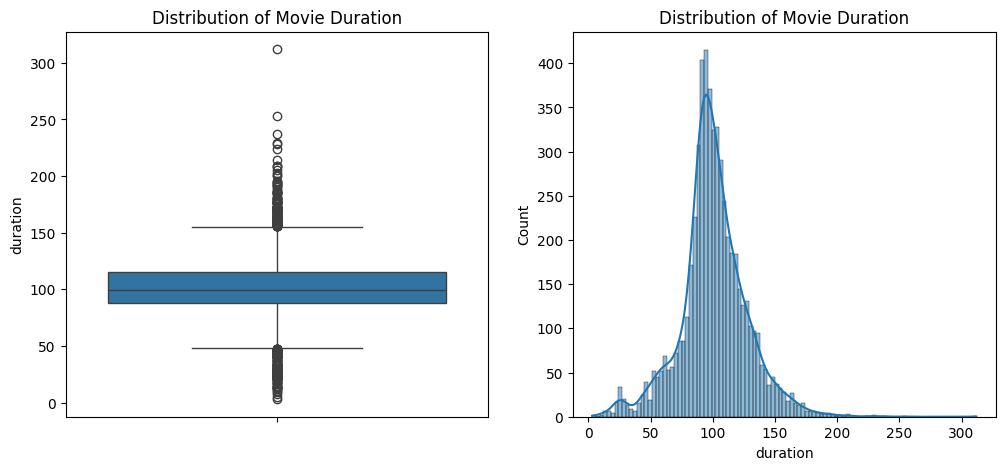

In [35]:
movies = df[df['type']=='Movie']
movies['duration'] = movies['duration'].apply(lambda x: int(x.replace(" min","")))
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=movies,y='duration')
plt.title("Distribution of Movie Duration")
plt.subplot(1,2,2)
sns.histplot(movies['duration'],kde='True')
plt.title("Distribution of Movie Duration")
plt.show()

Most of the movies on Netflix are having 100 minutes of duration (As we can see in both boxplot and distibution plot). So, it is advisable to make the movies around that duration.

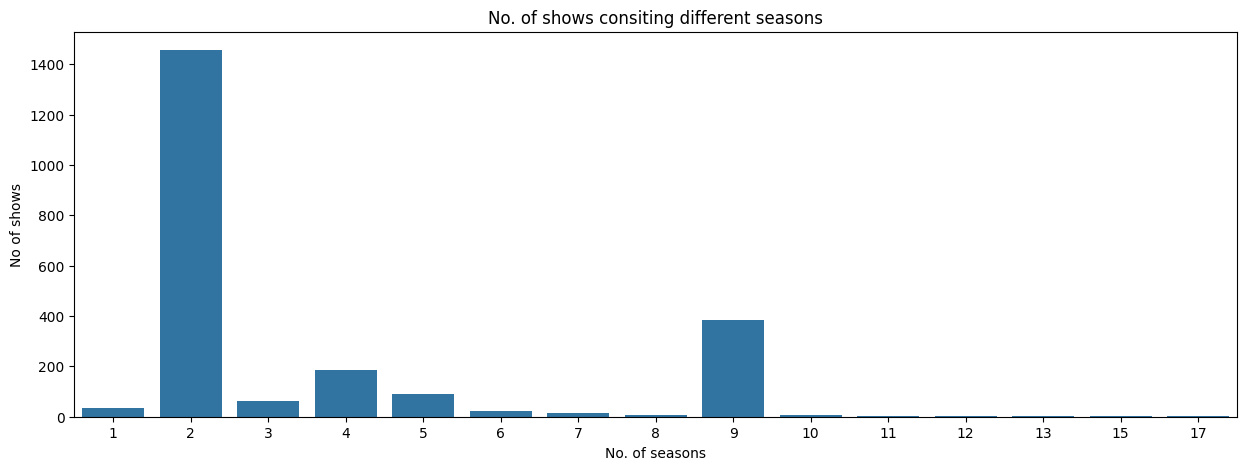

In [36]:
shows = df[df['type']=='TV Show']
shw_dur = shows['duration'].apply(lambda x: int(x.split(" ")[0]))
plt.figure(figsize=(15,5))
sns.barplot(x=shw_dur.unique(), y=shw_dur.value_counts())
plt.ylabel("No of shows")
plt.xlabel("No. of seasons")
plt.title("No. of shows consiting different seasons")
plt.show()

As we can see majority of the TV Shows are having 2 Seasons. So, it is advisable to make shows of around 2 seasons to keep the Story short as
well as enganging.

**Spliting the columns with comma & Transform its each element to a row**

In [37]:
def explode(x, col):
 return x.assign(**{col:x[col].str.split(', ')}).explode(col)
df_expanded = explode(explode(explode(explode(df[['show_id', 'title', 'type', 'listed_in', 'country','director','cast']],'listed_in'), 'country'), 'director'), 'cast')
df_expanded.head()


,show_id,title,type,listed_in,country,director,cast
0,s1,Dick Johnson Is Dead,Movie,Documentaries,United States,Kirsten Johnson,Not Available
1,s2,Blood & Water,TV Show,International TV Shows,South Africa,Not Available,Ama Qamata
1,s2,Blood & Water,TV Show,International TV Shows,South Africa,Not Available,Khosi Ngema
1,s2,Blood & Water,TV Show,International TV Shows,South Africa,Not Available,Gail Mabalane
1,s2,Blood & Water,TV Show,International TV Shows,South Africa,Not Available,Thabang Molaba


In [38]:
final_df = pd.merge(df[['show_id', 'title', 'date_added', 'release_year', 'rating','duration']],
 df_expanded,
on=['show_id','title'])
final_df.shape

(189869, 11)

Total no. of contents (including both movies anf tv shows) created / produced in each country is calculated. Then the top countries
where the total contents produced is more than 100 were selected.

In [39]:
countrywise = final_df.groupby('country')['title'].nunique().reset_index().sort_values(['title','country'],ascending=False)
countrywise = countrywise[countrywise['title']>100]
countrywise.head()

,country,title
119,United States,3680
47,India,1046
117,United Kingdom,803
22,Canada,445
38,France,393


Number of TV shows and movies produced by Top Countries are now compared. United States had the most number of TV shows and movies produced which is 3680,followed by India with 1046 Moves and TV shows produced.

In [45]:
country_typewise = final_df.groupby(['country','type'])['title'].nunique().reset_index().sort_values(['title','country'],ascending=False)
country_typewise = country_typewise[country_typewise['country'].isin(countrywise['country'].unique())]
country_typewise.head()

,country,type,title
238,United States,Movie,2748
94,India,Movie,962
239,United States,TV Show,932
234,United Kingdom,Movie,532
44,Canada,Movie,319


<ipython-input-46-35db041a79d5>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontdict= {'fontsize':14}, rotation=40, ha="right")
<ipython-input-46-35db041a79d5>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontdict= {'fontsize':14}, rotation=40, ha="right")


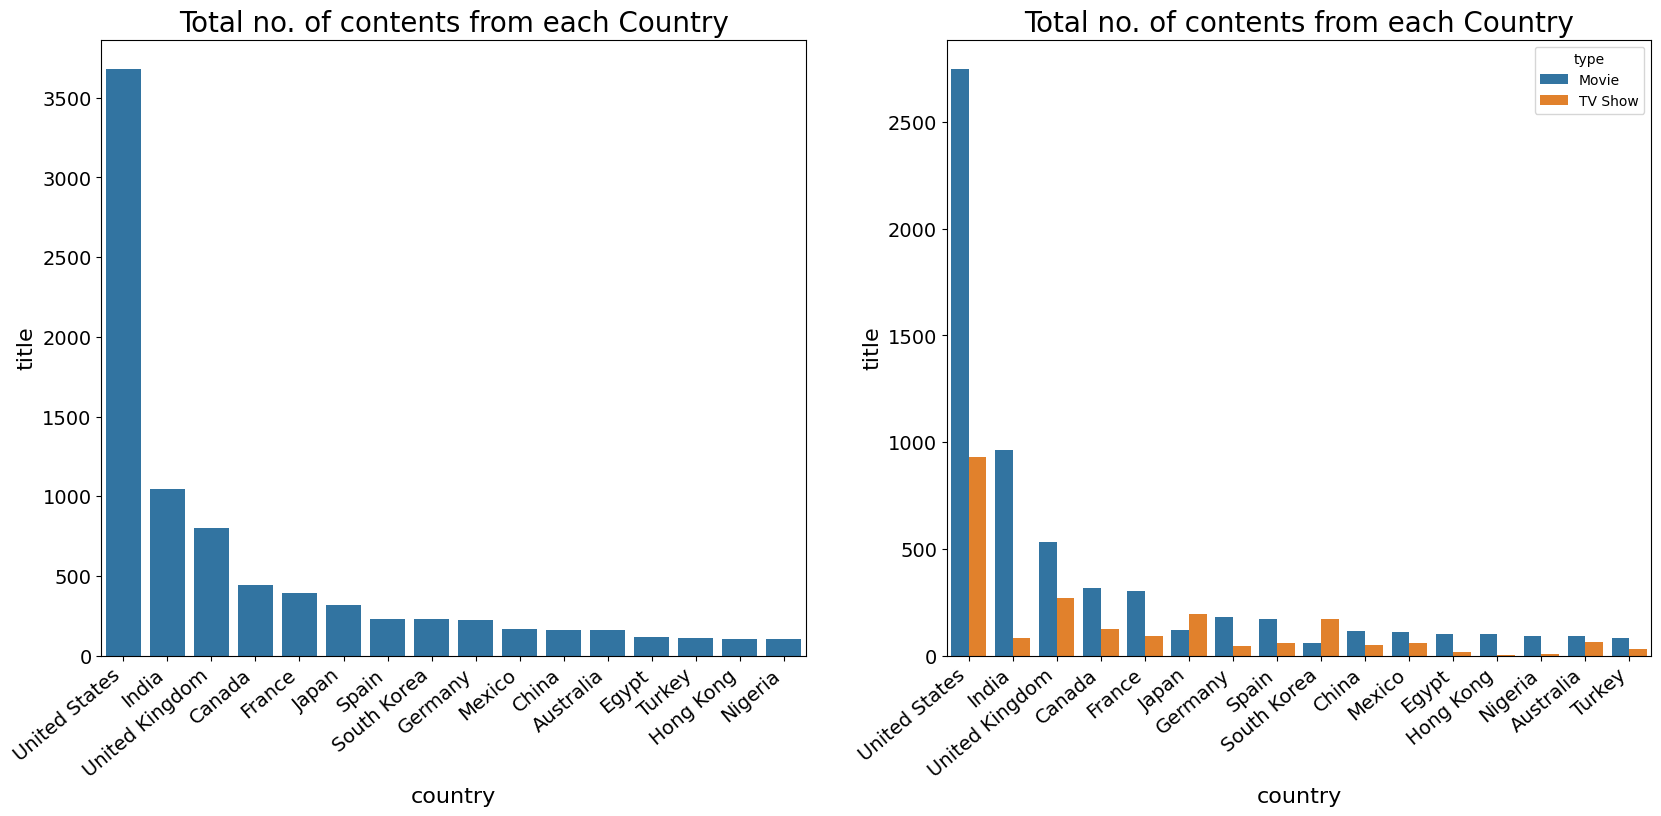

In [46]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
ax = sns.barplot(data=countrywise, x='country', y='title')
ax.set_xticklabels(ax.get_xticklabels(), fontdict= {'fontsize':14}, rotation=40, ha="right")
plt.tick_params(axis='y', which='major', labelsize=14)
ax.set_xlabel(ax.get_xlabel(), fontsize= 16)
ax.set_ylabel(ax.get_ylabel(), fontsize= 16)
plt.title('Total no. of contents from each Country', {'fontsize':20})
plt.subplot(1,2,2)
ax = sns.barplot(data=country_typewise, x='country', y='title', hue='type')
ax.set_xticklabels(ax.get_xticklabels(), fontdict= {'fontsize':14}, rotation=40, ha="right")
plt.tick_params(axis='y', which='major', labelsize=14)
ax.set_xlabel(ax.get_xlabel(), fontsize= 16)
ax.set_ylabel(ax.get_ylabel(), fontsize= 16)
plt.title('Total no. of contents from each Country', {'fontsize':20})
plt.show()

Based on the above bar plots, the insights we get are:
1. United States is the country which produces the largest number of both movies and TV Shows.
2. Although the overall contents created by India is the second largest but the number of TV Shows produced in India are less then United
Kingdom, Japan, South Korea and Canada.
3. The number of movies produced by all the countries are more than the number of TV Shows produced except for Japan and South Korea

**Analysing the Dataset Genrewise**

In [47]:
genre_movie = final_df[final_df['type']=='Movie'].groupby(['listed_in'])['title'].nunique().reset_index().sort_values(['title'],ascending=False)
genre_movie.head()

,listed_in,title
11,International Movies,2543
7,Dramas,2316
4,Comedies,1580
0,Action & Adventure,817
6,Documentaries,794


In [48]:
genre_tv_show = final_df[final_df['type']=='TV Show'].groupby(['listed_in'])['title'].nunique().reset_index().sort_values(['title'],ascending=False)
genre_tv_show.head()

,listed_in,title
5,International TV Shows,1126
15,TV Dramas,662
14,TV Comedies,493
3,Crime TV Shows,420
6,Kids' TV,368


<ipython-input-49-ce44aab6f400>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontdict= {'fontsize':14}, rotation=40, ha="right")
<ipython-input-49-ce44aab6f400>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontdict= {'fontsize':14}, rotation=40, ha="right")


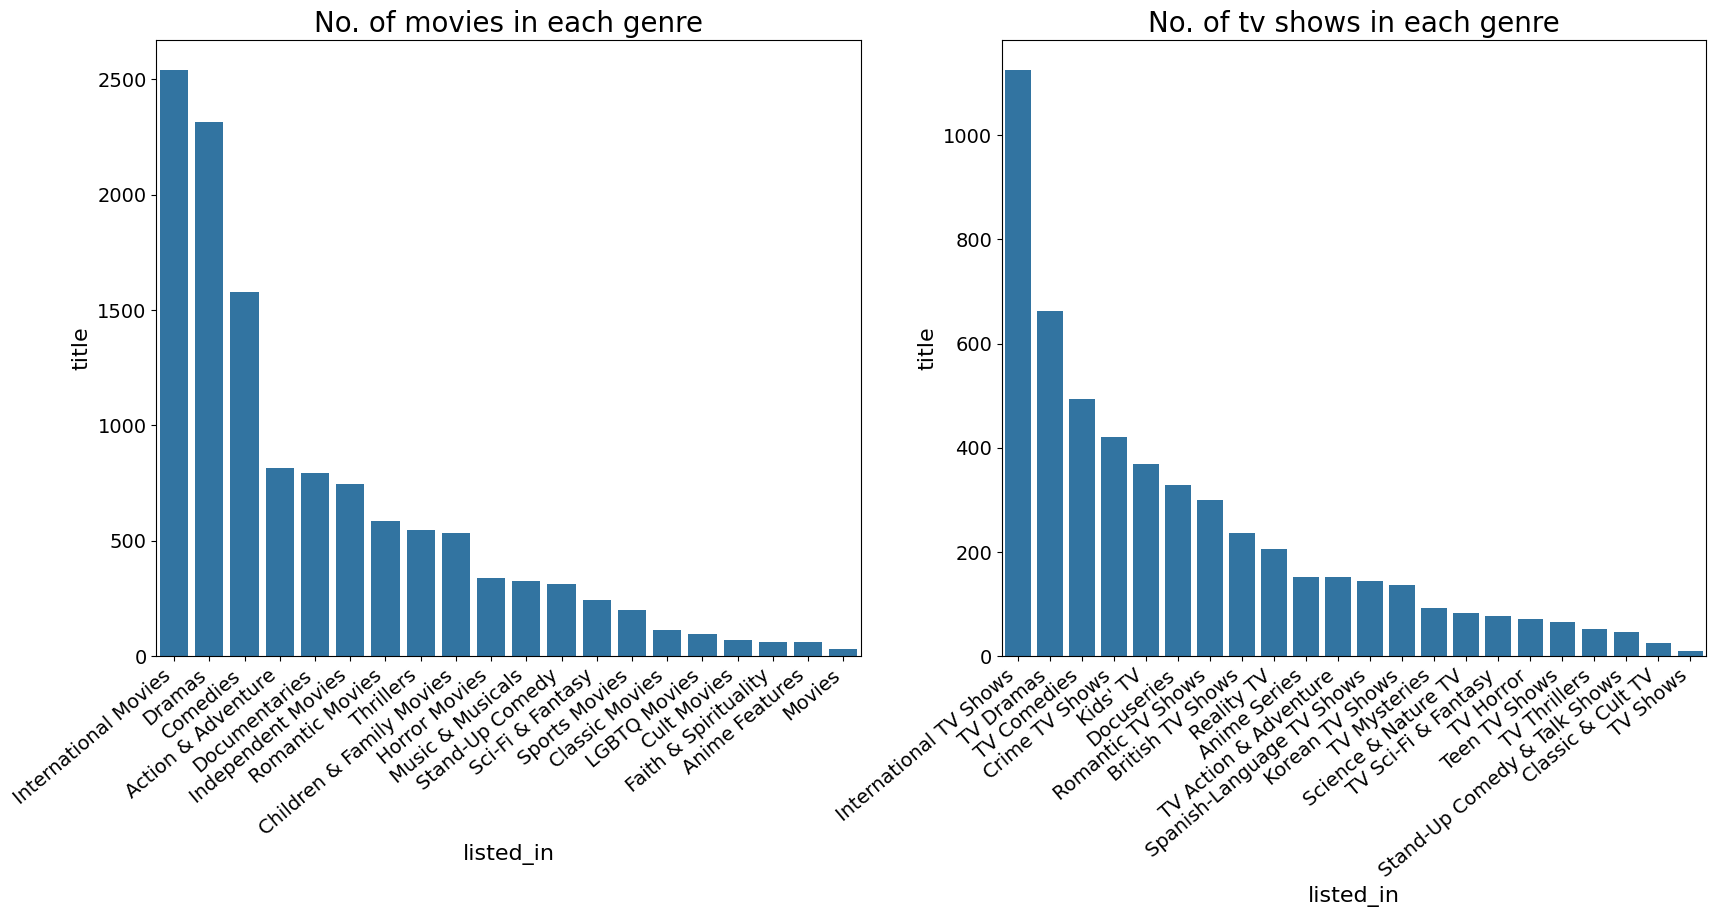

In [49]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
ax = sns.barplot(data=genre_movie, x='listed_in', y='title')
ax.set_xticklabels(ax.get_xticklabels(), fontdict= {'fontsize':14}, rotation=40, ha="right")
plt.tick_params(axis='y', which='major', labelsize=14)
ax.set_xlabel(ax.get_xlabel(), fontsize= 16)
ax.set_ylabel(ax.get_ylabel(), fontsize= 16)
plt.title('No. of movies in each genre', {'fontsize':20})
plt.subplot(1,2,2)
ax = sns.barplot(data=genre_tv_show, x='listed_in', y='title')
ax.set_xticklabels(ax.get_xticklabels(), fontdict= {'fontsize':14}, rotation=40, ha="right")
plt.tick_params(axis='y', which='major', labelsize=14)
ax.set_xlabel(ax.get_xlabel(), fontsize= 16)
ax.set_ylabel(ax.get_ylabel(), fontsize= 16)
plt.title('No. of tv shows in each genre', {'fontsize':20})
plt.show()

Based on the above bar plots, the insights we get are:
1. International Movies and International TV Shows are the top genres in having around 2500 movies and more than 1000 TV Shows
respectively
2. For movies the top 5 genres are:
i. International Movies,
ii. Dramas,
iii. Comedies,
iv. Action & Adventure,
v. Documentaries
3. Similarly the top 5 genres in tv shows are:
i. International TV Shows,
ii. TV Dramas,
iii. TV Comedies,
iv. Crime TV Shows,
v. Kids' TV

Analysing the change in number of contents (both movies and tv shows) in past 30 years.


In [50]:
recent_year = final_df[final_df['release_year']>=1990]
timeframe = recent_year.groupby(['release_year','type'])['title'].nunique().reset_index()
timeframe.sort_values(['release_year'],ascending=[False]).head(10)

,release_year,type,title
63,2021,TV Show,214
62,2021,Movie,169
61,2020,TV Show,391
60,2020,Movie,461
59,2019,TV Show,348
58,2019,Movie,565
57,2018,TV Show,324
56,2018,Movie,713
55,2017,TV Show,236
54,2017,Movie,729


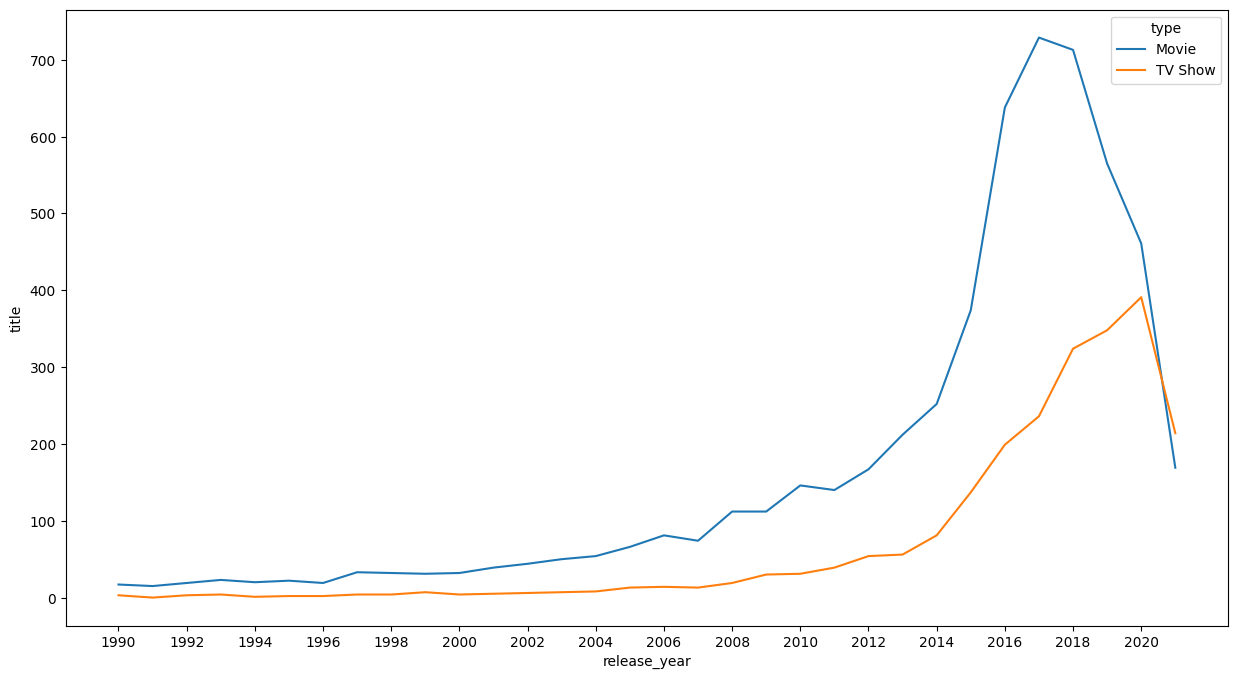

In [51]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(x=timeframe['release_year'],y=timeframe['title'],hue=timeframe['type'])
ax.set_xticks(np.arange(1990,2022,2))
plt.show()

The plot shows a steady increase in movies and TV shows from 1990-2004, with a gradual increase from 2004-2014. However, a significant spike in both occurred in 2020, attributed to the digital revolution and the introduction of 4G technology. The number of movies released in 2020 was also on a large scale due to the global lockdown, with people increasingly relying on OTT platforms like Netflix for entertainment. The number of TV shows released in 2020 was the highest due to the global pandemic. Overall, the digital revolution and 4G technology have contributed to the surge in movie and TV release.

Converted "date_added" column to Datetime datatype and created additional features (like month & years) from this column

In [52]:
final_df['date_added'] = pd.to_datetime(final_df['date_added'],format='mixed')
final_df['added_month'] = final_df['date_added'].dt.month_name()
final_df['added_year'] = final_df['date_added'].dt.year
monthwise = final_df.groupby(['added_month','type'])['title'].nunique().reset_index().sort_values(['added_month','type'],ascending=True)
monthwise.head()

,added_month,type,title
0,April,Movie,511
1,April,TV Show,182
2,August,Movie,471
3,August,TV Show,195
4,December,Movie,518


<ipython-input-55-bad5e82858c0>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


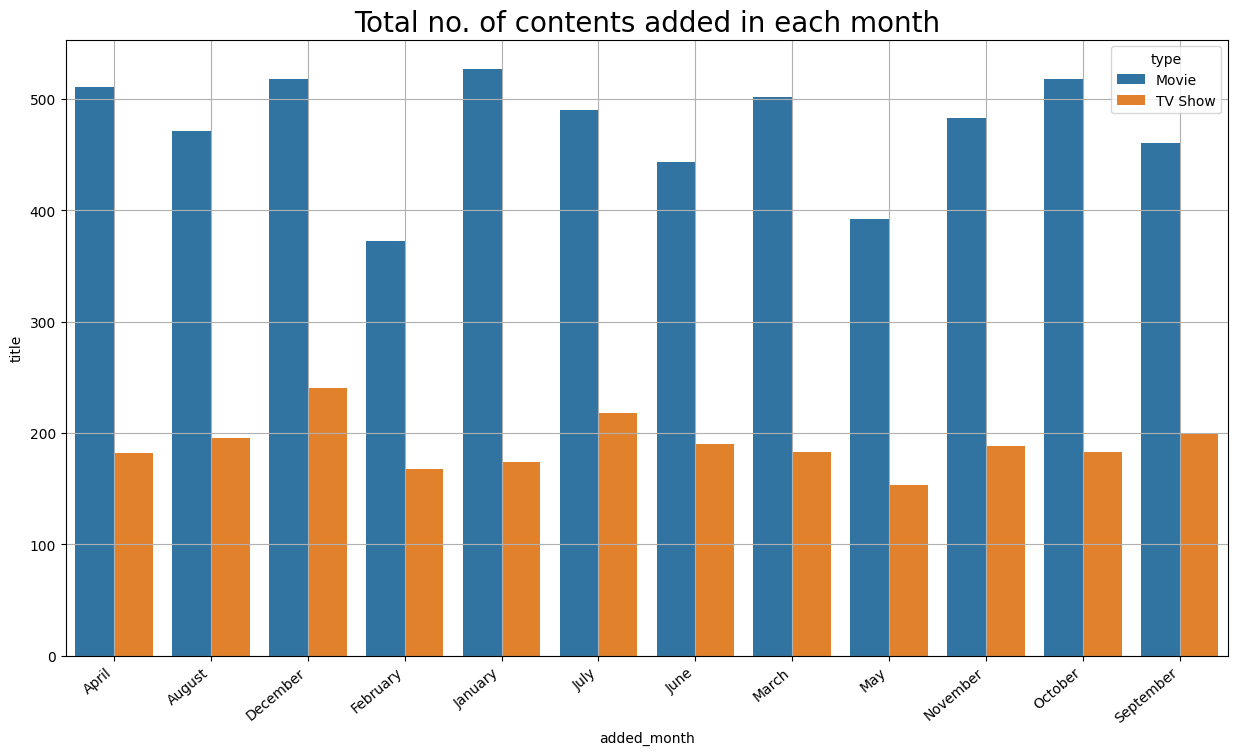

In [55]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=monthwise, x='added_month', y='title', hue='type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Total no. of contents added in each month', {'fontsize':20})
plt.grid()
plt.show()


1. From the above bar graph, we can notice that apart from February and May, the number of movies added to Netflix in every other month is
quite high and in January, December and October it is highest. So, it advisable to add any new movie in these 3 months specially (due to
many occasions like Christmas, New year, etc).

2. For tv shows, we can notice that the number of tv shows added to Netflix is highest in December and it is lowest in the month of February. So,
it advisabe to add any new tv shows during December due to Christmas festival.

**Recommendations and Actionable Insights**
1.   Most of the movies on Netflix are having 100 minutes of duration (As we can see in both boxplot and distibution plot). So, it is advisable to make the movies around that duration.
2.   As we can see majority of the TV Shows are having 2 Seasons. So, it is advisable to make shows of around 2 seasons to keep the Story short as
well as enganging.
3.  For movies the top 5 genres are International Movies, Dramas, Comedies, Action & Adventure and Documentaries. Similarly the top 5 genres in tv shows are International TV Shows, TV Dramas, TV Comedies, Crime TV Shows and Kids' TV. It is better for Netflix to undertake these genres for improving the revenue.
4. Typically Japan and South Korean Audience view more of TV shows than Movies unlike other countries, could encourage more of TV shows for these Audience.
5. Although India have second largest contents in Netflix, it lacks TV shows. Considering huge consumer base in India, encouraging more TV shows for Indian Audience could boost the revenue.
























































